In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_excel('Student_data_new.xlsx', engine = "openpyxl")
print(df.shape)

print(df.shape)

(10071, 16)
(10071, 16)


## Basic NLTK

# Step 1. VADER Seniment Scoring
### We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

    This uses a "bag of words" approach:
    Stop words are removed
    each word is scored and combined to a total score.

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [4]:
df.head()

,Respondent ID,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Major Conc,Citizenship Status,Co-op #,Classroom activities,Coursework,Most important skills,Skills to develop,What made job interesting,Learn and Focus,year
0,2301,201635-201645,SR,B,ACCT,5COP,NaN,US Citizen,Third/Final,Somewhat prepared me. Most of the skills I us...,"Audit, Accounting, Strategic Management, Opera...","Professionalism, software skills, and how my l...",How to do do better reports.,"It was audit, an area I have never tried.",Satisfying my CPA requirements.,2016
1,2311,201635-201645,JR,B,BAE,5COP,NaN,US Citizen,Third/Final,My classroom activities did not prepare me all...,Technical communications_x000D_\n,Leadership and organizational skills,Self starter skills,More opportunity to thrive,Construction knowledge,2016
2,2318,201635-201645,JR,B,FIN,5COP,NaN,US Citizen,First,Even though this co-op was not related to my c...,None,Patience. I had to be patient with customers a...,Learn how to deal with people who are rude.,If I actually got the chance to be a real mana...,I want to develop the skills needed to pursue ...,2016
3,2168,201625-201635,JR,B,ACCT,5COP,NaN,US Citizen,Third/Final,All of my accounting courses helped me on this...,Accounting,Auditing skills.,I need to study for the CPA and pass all 4 parts.,Working on a greater variety of clients.,Accounting courses.,2016
4,2343,201635-201645,SR,B,ACCT,5COP,NaN,Non US Citizen,Third/Final,My classroom activities really do not help me ...,Finance and Excel,Excel and Knowledge of E-commerce software's,"Writting, Language, Advanced Excel Skills",Higher Hourly Salary,My Writting Skills and improving my English level,2016


# Polarity score on entire data set

In [5]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Classroom activities']
    myid = row['Respondent ID']
    res[myid] = sia.polarity_scores(str(text))

  0%|          | 0/10071 [00:00<?, ?it/s]

In [6]:
res[1]

{'neg': 0.0, 'neu': 0.878, 'pos': 0.122, 'compound': 0.6908}

In [7]:
senti = pd.DataFrame(res).T

In [8]:
senti = pd.DataFrame(res).T
senti = senti.reset_index().rename(columns = {"index": "Respondent ID", "compound": "Sentiment Score"})
senti = senti.merge(df, how = "left")                    

In [9]:
senti.head()

,Respondent ID,neg,neu,pos,Sentiment Score,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Major Conc,Citizenship Status,Co-op #,Classroom activities,Coursework,Most important skills,Skills to develop,What made job interesting,Learn and Focus,year
0,2301,0.000,0.890,0.110,0.1548,201635-201645,SR,B,ACCT,5COP,NaN,US Citizen,Third/Final,Somewhat prepared me. Most of the skills I us...,"Audit, Accounting, Strategic Management, Opera...","Professionalism, software skills, and how my l...",How to do do better reports.,"It was audit, an area I have never tried.",Satisfying my CPA requirements.,2016
1,2311,0.000,0.937,0.063,0.2732,201635-201645,JR,B,BAE,5COP,NaN,US Citizen,Third/Final,My classroom activities did not prepare me all...,Technical communications_x000D_\n,Leadership and organizational skills,Self starter skills,More opportunity to thrive,Construction knowledge,2016
2,2318,0.000,0.808,0.192,0.9964,201635-201645,JR,B,FIN,5COP,NaN,US Citizen,First,Even though this co-op was not related to my c...,None,Patience. I had to be patient with customers a...,Learn how to deal with people who are rude.,If I actually got the chance to be a real mana...,I want to develop the skills needed to pursue ...,2016
3,2318,0.000,0.808,0.192,0.9964,201535-201535,SR,B,MKTG,5COP,NaN,Non US Citizen,Third,_x000D_\nSome of the things that I have defini...,com270,Communication and fast thinking skills.,Multi-tasking and prioritizing.,None,More digital marketing and event planning.,2015
4,2168,0.128,0.872,0.000,-0.2960,201625-201635,JR,B,ACCT,5COP,NaN,US Citizen,Third/Final,All of my accounting courses helped me on this...,Accounting,Auditing skills.,I need to study for the CPA and pass all 4 parts.,Working on a greater variety of clients.,Accounting courses.,2016


## Sentiment score and our data set merged together

In [10]:
senti.head()

,Respondent ID,neg,neu,pos,Sentiment Score,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,Major Conc,Citizenship Status,Co-op #,Classroom activities,Coursework,Most important skills,Skills to develop,What made job interesting,Learn and Focus,year
0,2301,0.000,0.890,0.110,0.1548,201635-201645,SR,B,ACCT,5COP,NaN,US Citizen,Third/Final,Somewhat prepared me. Most of the skills I us...,"Audit, Accounting, Strategic Management, Opera...","Professionalism, software skills, and how my l...",How to do do better reports.,"It was audit, an area I have never tried.",Satisfying my CPA requirements.,2016
1,2311,0.000,0.937,0.063,0.2732,201635-201645,JR,B,BAE,5COP,NaN,US Citizen,Third/Final,My classroom activities did not prepare me all...,Technical communications_x000D_\n,Leadership and organizational skills,Self starter skills,More opportunity to thrive,Construction knowledge,2016
2,2318,0.000,0.808,0.192,0.9964,201635-201645,JR,B,FIN,5COP,NaN,US Citizen,First,Even though this co-op was not related to my c...,None,Patience. I had to be patient with customers a...,Learn how to deal with people who are rude.,If I actually got the chance to be a real mana...,I want to develop the skills needed to pursue ...,2016
3,2318,0.000,0.808,0.192,0.9964,201535-201535,SR,B,MKTG,5COP,NaN,Non US Citizen,Third,_x000D_\nSome of the things that I have defini...,com270,Communication and fast thinking skills.,Multi-tasking and prioritizing.,None,More digital marketing and event planning.,2015
4,2168,0.128,0.872,0.000,-0.2960,201625-201635,JR,B,ACCT,5COP,NaN,US Citizen,Third/Final,All of my accounting courses helped me on this...,Accounting,Auditing skills.,I need to study for the CPA and pass all 4 parts.,Working on a greater variety of clients.,Accounting courses.,2016


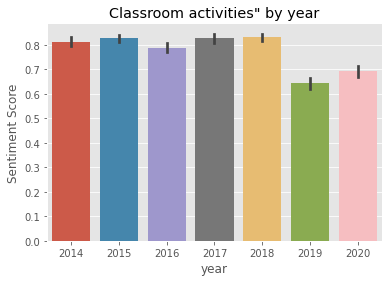

In [11]:

ax = sns.barplot(data=senti, x='year', y='Sentiment Score', estimator='mean', errorbar=('ci', 95))

ax.set_title('Classroom activities" by year')
plt.show()

In [12]:
senti['sentiment'] = senti['Sentiment Score'].apply(lambda c: 'Positive' if c >=0.5 else ('Negative' if c < 0 else 'Neutral'))

senti.head(5)

,Respondent ID,neg,neu,pos,Sentiment Score,Work Terms,Class (BOT),College Code,Major Code,Coop Conc,...,Citizenship Status,Co-op #,Classroom activities,Coursework,Most important skills,Skills to develop,What made job interesting,Learn and Focus,year,sentiment
0,2301,0.000,0.890,0.110,0.1548,201635-201645,SR,B,ACCT,5COP,...,US Citizen,Third/Final,Somewhat prepared me. Most of the skills I us...,"Audit, Accounting, Strategic Management, Opera...","Professionalism, software skills, and how my l...",How to do do better reports.,"It was audit, an area I have never tried.",Satisfying my CPA requirements.,2016,Neutral
1,2311,0.000,0.937,0.063,0.2732,201635-201645,JR,B,BAE,5COP,...,US Citizen,Third/Final,My classroom activities did not prepare me all...,Technical communications_x000D_\n,Leadership and organizational skills,Self starter skills,More opportunity to thrive,Construction knowledge,2016,Neutral
2,2318,0.000,0.808,0.192,0.9964,201635-201645,JR,B,FIN,5COP,...,US Citizen,First,Even though this co-op was not related to my c...,None,Patience. I had to be patient with customers a...,Learn how to deal with people who are rude.,If I actually got the chance to be a real mana...,I want to develop the skills needed to pursue ...,2016,Positive
3,2318,0.000,0.808,0.192,0.9964,201535-201535,SR,B,MKTG,5COP,...,Non US Citizen,Third,_x000D_\nSome of the things that I have defini...,com270,Communication and fast thinking skills.,Multi-tasking and prioritizing.,None,More digital marketing and event planning.,2015,Positive
4,2168,0.128,0.872,0.000,-0.2960,201625-201635,JR,B,ACCT,5COP,...,US Citizen,Third/Final,All of my accounting courses helped me on this...,Accounting,Auditing skills.,I need to study for the CPA and pass all 4 parts.,Working on a greater variety of clients.,Accounting courses.,2016,Negative


<AxesSubplot:title={'center':'All years'}, ylabel='sentiment'>

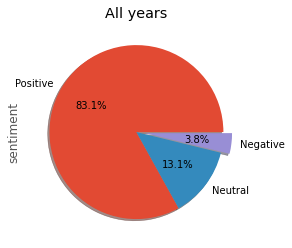

In [13]:
senti["sentiment"].value_counts().plot.pie(y='All years', title="All years", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'2016'}, ylabel='sentiment'>

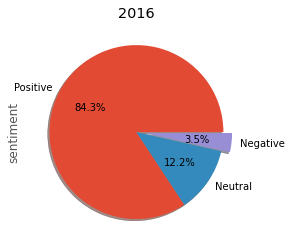

In [14]:
filt = senti["year"] == 2016
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2016", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)


<AxesSubplot:title={'center':'2015'}, ylabel='sentiment'>

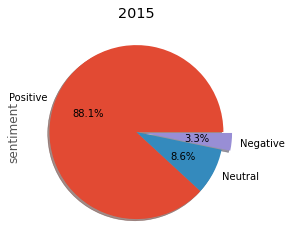

In [15]:
filt = senti["year"] == 2015
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2015", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'2017'}, ylabel='sentiment'>

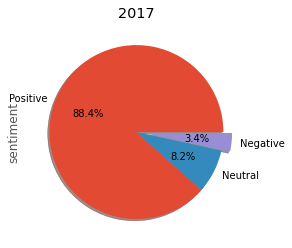

In [16]:
filt = senti["year"] == 2017
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2017", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'2018'}, ylabel='sentiment'>

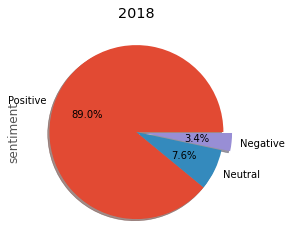

In [17]:
filt = senti["year"] == 2018
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2018", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'2019'}, ylabel='sentiment'>

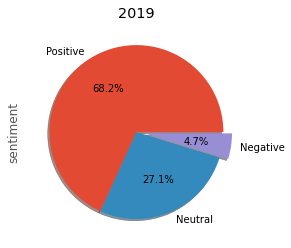

In [18]:
filt = senti["year"] == 2019
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2019", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'2020'}, ylabel='sentiment'>

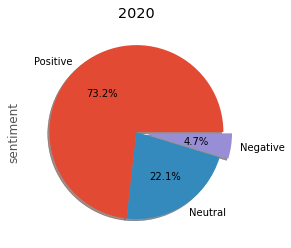

In [19]:
filt = senti["year"] == 2020
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2020", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)